In [4]:
sys.path.insert(0, r'C:\Users\pasca\Dropbox\DataScienceAndProgramming\Projects\tox-block\tox-block')
from tox_block.config import config
from tox_block.data_processing import preprocessors as pp
from tox_block.data_processing import data_handling as dh
from tox_block.model import lstm_multi_label
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import re


In [5]:
X_train, y_train = dh.load_data_multi_labels(config.TRAINING_DATA_FILE)
X_test, y_test = dh.load_data_multi_labels(config.TESTING_DATA_FILE)

In [3]:
X_train_processed = pd.read_csv("../data/X_train.csv",skip_blank_lines=False)
X_test_processed = pd.read_csv("../data/X_test.csv",skip_blank_lines=False)

In [4]:
y_train.sum()/len(y_train)

toxic            0.095844
severe_toxic     0.009996
obscene          0.052948
threat           0.002996
insult           0.049364
identity_hate    0.008805
dtype: float64

In [5]:
length_processed = X_train_processed.comment_text.str.len()

(array([1206., 5422., 9186., 8367., 8617., 7243., 7571., 6540., 6613.,
        5375., 5484., 4624., 4696., 3909., 4146., 3436., 3553., 3048.,
        3107., 2868.]),
 array([  1. ,  10.5,  20. ,  29.5,  39. ,  48.5,  58. ,  67.5,  77. ,
         86.5,  96. , 105.5, 115. , 124.5, 134. , 143.5, 153. , 162.5,
        172. , 181.5, 191. ]),
 <a list of 20 Patch objects>)

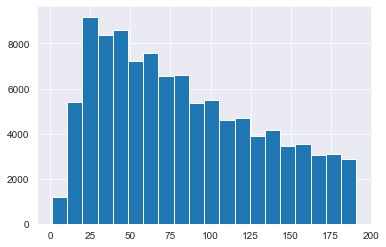

In [6]:
plt.hist(length_processed[length_processed<length_processed.quantile(0.66)],bins=20)

In [7]:
length = X_train.comment_text.str.len()

(array([1078., 9500., 8956., 8118., 7658., 7175., 6859., 6329., 6161.,
        5397., 5319., 4793., 4286., 4013., 3751., 3519., 3366., 3226.,
        2924., 2749.]),
 array([  6. ,  21.9,  37.8,  53.7,  69.6,  85.5, 101.4, 117.3, 133.2,
        149.1, 165. , 180.9, 196.8, 212.7, 228.6, 244.5, 260.4, 276.3,
        292.2, 308.1, 324. ]),
 <a list of 20 Patch objects>)

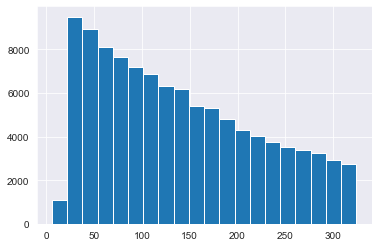

In [8]:
plt.hist(length[length<length.quantile(0.66)],bins=20)

In [9]:
length_toxic = X_train[y_train.sum(axis=1)>1].comment_text.str.len()

(array([ 138., 1134.,  967.,  843.,  677.,  581.,  493.,  449.,  389.,
         323.,  290.,  261.,  235.,  202.,  188.,  165.,  170.,  129.,
         132.,  122.]),
 array([  8.  ,  21.85,  35.7 ,  49.55,  63.4 ,  77.25,  91.1 , 104.95,
        118.8 , 132.65, 146.5 , 160.35, 174.2 , 188.05, 201.9 , 215.75,
        229.6 , 243.45, 257.3 , 271.15, 285.  ]),
 <a list of 20 Patch objects>)

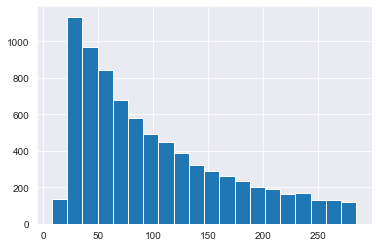

In [10]:
plt.hist(length_toxic[length_toxic<length_toxic.quantile(0.8)],bins=20)

In [3]:
ts = pp.TokenSequencer()
X_train_seq = ts.fit_transform(X_train)

In [7]:
mat = get_embedding_matrix(ts)


In [10]:
mat

array([[ 0.50208854, -0.83718498,  0.22344183, ...,  1.51389874,
         0.28933581,  1.37849469],
       [ 0.41800001,  0.24968   , -0.41242   , ..., -0.18411   ,
        -0.11514   , -0.78580999],
       [ 0.68046999, -0.039263  ,  0.30186   , ..., -0.073297  ,
        -0.064699  , -0.26043999],
       ...,
       [-0.13491   , -0.8635    , -0.033898  , ...,  0.29484999,
        -0.24315999,  0.81682003],
       [ 0.1178    ,  0.14624   , -0.28240001, ..., -0.19529   ,
        -0.13610999,  1.04270005],
       [-0.64388001, -0.54152   ,  0.10305   , ..., -0.06732   ,
        -0.73308003,  0.88625002]])

Merge train and test data for the final training of the production model.

In [7]:
train = pd.read_csv(r"C:\Users\pasca\Dropbox\DataScienceAndProgramming\Projects\tox-block\tox-block\tox_block\data\train.csv")
test = pd.read_csv(r"C:\Users\pasca\Dropbox\DataScienceAndProgramming\Projects\tox-block\tox-block\tox_block\data\test.csv")

In [21]:
merged = pd.concat([train,test]).sample(frac=1, replace=False)

In [22]:
merged.to_csv("../data/merged.csv", index=False)